In [1]:
import cellmesh
import matplotlib.pyplot as plt
import numpy as np

## CellMeSH statistics

### Number of Cells

In [2]:
all_cell_ids = cellmesh.get_all_cell_id_names(include_cell_components=True,
                                              include_cell_lines=True, include_chromosomes=True)
len(all_cell_ids)

570

In [3]:
subset_cell_ids = cellmesh.get_all_cell_id_names(include_cell_components=False,
                                                include_cell_lines=False,
                                                include_chromosomes=False)
len(subset_cell_ids)

292

There are 570 total entries, and 292 entries after excluding cell components (organelles and the like), cell lines, and chromosomes.

### Number of Genes

In [4]:
human_genes = cellmesh.get_all_genes(species='human')
print('number of human genes:', len(human_genes))

number of human genes: 20138


In [5]:
mouse_genes = cellmesh.get_all_genes(species='mouse')
print('number of mouse genes:', len(mouse_genes))

number of mouse genes: 27322


In [6]:
worm_genes = cellmesh.get_all_genes(species='c_elegans')
print('number of c. elegans genes:', len(worm_genes))

number of c. elegans genes: 20135


### Distribution of Genes Per Cell (human)

In [7]:
human_genes_per_cell = {}
for cell_id, cell_name in subset_cell_ids:
    human_genes_per_cell[cell_id, cell_name] = cellmesh.get_cell_genes_pmids(cell_id, species='human',
                                                                             threshold=0)
human_nonzero_genes_per_cell = {k: len(v) for k, v in human_genes_per_cell.items()}
genes_count = np.array([v for k, v in human_nonzero_genes_per_cell.items()])
cell_id_names = np.array([k for k, v in human_nonzero_genes_per_cell.items()])

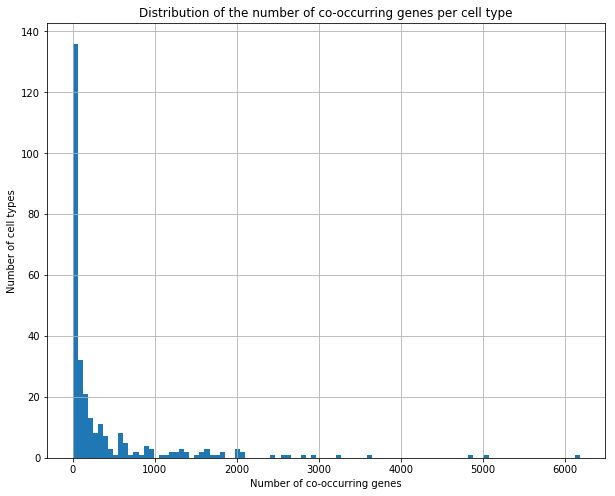

In [8]:
plt.figure(figsize=(10, 8))
plt.title('Distribution of the number of co-occurring genes per cell type')
plt.hist(genes_count, bins=100)
plt.grid()
plt.xlabel('Number of co-occurring genes')
plt.ylabel('Number of cell types')
plt.show()

In [9]:
print('mean genes per cell:', np.mean(genes_count))
print('median genes per cell:', np.median(genes_count))

mean genes per cell: 397.88013698630135
median genes per cell: 72.5


In [10]:
print('number of cells with zero genes:', (genes_count == 0).sum())
print('number of cells with one gene:', (genes_count == 1).sum())
print('number of cells with more than one gene:', (genes_count > 1).sum())

number of cells with zero genes: 19
number of cells with one gene: 13
number of cells with more than one gene: 260


### Distribution of Cells Per Gene (human)

In [32]:
human_cells_per_gene = {}
human_refs_per_gene = {}
for gene in human_genes:
    human_cells_per_gene[gene] = []
    human_refs_per_gene[gene] = 0
for cell_id, cell_name in subset_cell_ids:
    gene_list = cellmesh.get_cell_genes_pmids(cell_id, species='human', threshold=0, return_count=True)
    for gene, gene_id, count in gene_list:
        human_cells_per_gene[gene].append((cell_id, cell_name))
        human_refs_per_gene[gene] += count
        
human_nonzero_cells_per_gene = {k: len(v) for k, v in human_cells_per_gene.items()}
cells_count = np.array([v for k, v in human_nonzero_cells_per_gene.items()])
gene_names = np.array([k for k, v in human_nonzero_cells_per_gene.items()])
gene_ref_counts = np.array([human_refs_per_gene[k] for k in gene_names])

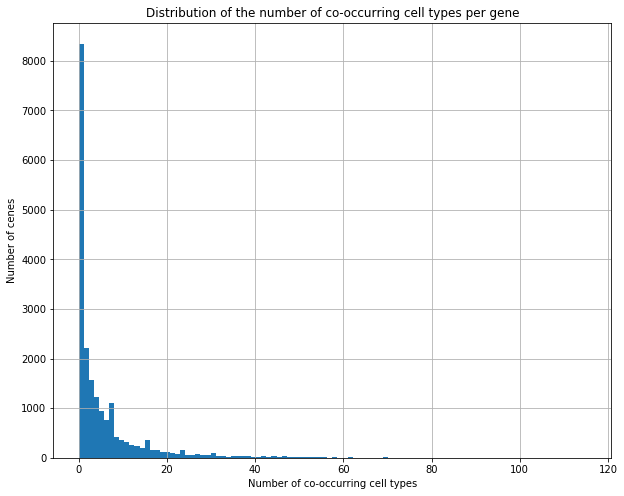

In [12]:
plt.figure(figsize=(10, 8))
plt.title('Distribution of the number of co-occurring cell types per gene')
plt.hist(cells_count, bins=100)
plt.grid()
plt.xlabel('Number of co-occurring cell types')
plt.ylabel('Number of genes')
plt.show()

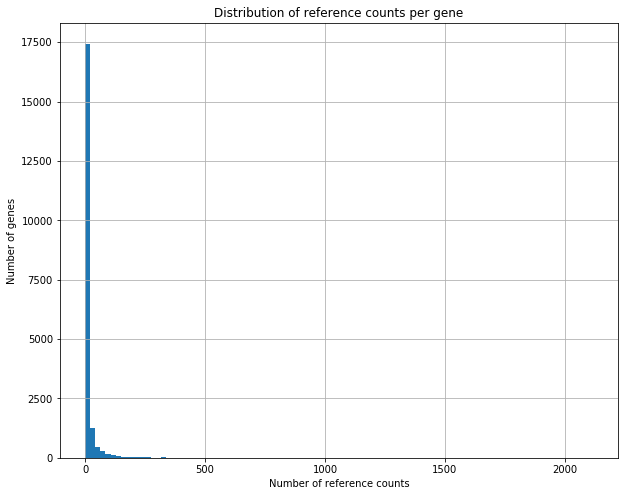

In [33]:
plt.figure(figsize=(10, 8))
plt.title('Distribution of reference counts per gene')
plt.hist(gene_ref_counts, bins=100)
plt.grid()
plt.xlabel('Number of reference counts')
plt.ylabel('Number of genes')
plt.show()

In [34]:
print('mean cells per gene:', np.mean(cells_count))
print('median cells per gene:', np.median(cells_count))

print('mean referencess per gene:', np.mean(gene_ref_counts))
print('median references per gene:', np.median(gene_ref_counts))

mean cells per gene: 5.769242228622505
median cells per gene: 2.0
mean referencess per gene: 15.096484258615552
median references per gene: 3.0


In [14]:
print('number of genes with zero cell types:', (cells_count == 0).sum())
print('number of genes with one cell type:', (cells_count == 1).sum())
print('number of genes with more than one cell type:', (cells_count > 1).sum())

number of genes with zero cell types: 4975
number of genes with one cell type: 3371
number of genes with more than one cell type: 11792


### Extrema

In [15]:
# top 10 cell types by gene count
gene_count_indices = np.argsort(genes_count)[::-1]
print('cell with most genes:')
for x, y in zip(cell_id_names[gene_count_indices[:20]], genes_count[gene_count_indices[:20]]):
    print('Cell type:', x, 'gene count:', y)
print()

# cell types with zero genes
print('cells with zero genes:')
print(cell_id_names[genes_count == 0])



cell with most genes:
Cell type: ['D005347' 'Fibroblasts'] gene count: 6186
Cell type: ['D009474' 'Neurons'] gene count: 5013
Cell type: ['D004847' 'Epithelial Cells'] gene count: 4852
Cell type: ['D013601' 'T-Lymphocytes'] gene count: 3592
Cell type: ['D008264' 'Macrophages'] gene count: 3233
Cell type: ['D013234' 'Stem Cells'] gene count: 2953
Cell type: ['D009000' 'Monocytes'] gene count: 2803
Cell type: ['D042783' 'Endothelial Cells'] gene count: 2603
Cell type: ['D001402' 'B-Lymphocytes'] gene count: 2589
Cell type: ['D008214' 'Lymphocytes'] gene count: 2415
Cell type: ['D015603' 'Keratinocytes'] gene count: 2069
Cell type: ['D015496' 'CD4-Positive T-Lymphocytes'] gene count: 2063
Cell type: ['D050199' 'Podocytes'] gene count: 2033
Cell type: ['D007694' 'Killer Cells, Natural'] gene count: 2000
Cell type: ['D007963' 'Leukocytes, Mononuclear'] gene count: 1999
Cell type: ['D007962' 'Leukocytes'] gene count: 1847
Cell type: ['D006412' 'Hematopoietic Stem Cells'] gene count: 1804
Cel

In [35]:
# top 10 genes by cell type count
cell_count_indices = np.argsort(cells_count)[::-1]
human_genes = np.array(human_genes)
cells_count = np.array(cells_count)
print('genes associated with most cell types:')
for x, y in zip(human_genes[cell_count_indices[:20]], cells_count[cell_count_indices[:20]]):
    print('Gene:', x, 'cell type count:', y)


genes associated with most cell types:
Gene: L3HYPDH cell type count: 115
Gene: HAX1 cell type count: 110
Gene: SPRR2G cell type count: 107
Gene: CDV3 cell type count: 105
Gene: FGD4 cell type count: 101
Gene: MEP1A cell type count: 100
Gene: BRINP1 cell type count: 98
Gene: ARHGEF12 cell type count: 98
Gene: COMMD4 cell type count: 95
Gene: CCL4L2 cell type count: 94
Gene: PRR14 cell type count: 94
Gene: GLB1 cell type count: 93
Gene: SPRED1 cell type count: 93
Gene: FAM20C cell type count: 91
Gene: MAFB cell type count: 90
Gene: S100PBP cell type count: 87
Gene: MYADML2 cell type count: 87
Gene: HLA-DRB5 cell type count: 87
Gene: LOC112268320 cell type count: 87
Gene: ZAN cell type count: 85


In [36]:
# top 20 genes by references
ref_count_indices = np.argsort(gene_ref_counts)[::-1]
print('genes associated with most cell types:')
for x, y in zip(human_genes[ref_count_indices[:20]], gene_ref_counts[ref_count_indices[:20]]):
    print('Gene:', x, 'reference count:', y)


genes associated with most cell types:
Gene: HAX1 reference count: 2115
Gene: L3HYPDH reference count: 2017
Gene: CDV3 reference count: 1550
Gene: FGD4 reference count: 1419
Gene: COMMD4 reference count: 1364
Gene: FOXN1 reference count: 1363
Gene: CNMD reference count: 1345
Gene: SPRR2G reference count: 1338
Gene: S100PBP reference count: 1242
Gene: ZAN reference count: 1241
Gene: GID4 reference count: 1222
Gene: UPF3B reference count: 1174
Gene: ARHGEF12 reference count: 1116
Gene: FAM20C reference count: 1078
Gene: CCL4L2 reference count: 1065
Gene: SYPL2 reference count: 1012
Gene: MEP1A reference count: 941
Gene: MSBP1 reference count: 900
Gene: GLB1 reference count: 853
Gene: BRINP1 reference count: 852
